# Clifford Randomized Benchmarking (RB)

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Choose (or define) a backend

In [12]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

## Set IQM Token if using Resonance.

In [13]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Randomized Benchmarking Configuration

NB: Clifford RB is executed by default with Interleaved RB !

In [14]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

In [15]:
EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[0,1],[3,4]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(6)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

## Run the experiment

In [16]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

2024-12-17 11:56:12,750 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2024-12-17 11:56:12,750 - iqm.benchmarks.logging_config - INFO - Executing sequential Clifford RB on qubits [0, 1]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63]
2024-12-17 11:56:12,750 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2024-12-17 11:56:12,831 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2024-12-17 11:56:12,992 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2024-12-17 11:56:13,341 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2024-12-17 11:56:14,040 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2024-12-17 11:56:20,469 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2024-12-17 11:56:23,291 - iqm.benchmarks.logging_config - INFO - Submitting batch with 25 circuits corresponding to qubits [0, 1]
2024-12-17

## Perform the analysis

In [17]:
result_clifford_rb = benchmark_clifford_rb.analyze()

2024-12-17 11:56:45,931 - iqm.benchmarks.logging_config - INFO - Post-processing sequential RB for qubits [[0, 1], [3, 4]]
2024-12-17 11:56:45,938 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 1
2024-12-17 11:56:45,945 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 3
2024-12-17 11:56:45,952 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 7
2024-12-17 11:56:45,959 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 15
2024-12-17 11:56:45,966 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 31
2024-12-17 11:56:45,972 - iqm.benchmarks.logging_config - INFO - Qubits [0, 1] and depth 63
2024-12-17 11:56:45,979 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 1
2024-12-17 11:56:45,986 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 3
2024-12-17 11:56:45,993 - iqm.benchmarks.logging_config - INFO - Qubits [3, 4] and depth 7
2024-12-17 11:56:45,999 - iqm.benchmarks.logging_config

{'clifford': {'[0, 1]': 0.946844466999168}}
[0, 1]
clifford
{'clifford': {'[3, 4]': 0.9429197366921651}}
[3, 4]
clifford


In [18]:
run_clifford_rb.dataset.attrs

{'session_timestamp': '20241217-115553',
 'execution_timestamp': '20241217-115553',
 'backend_configuration_name': 'fakeapollo',
 'backend_name': 'IQMFakeApolloBackend',
 'benchmark': 'clifford_rb',
 'shots': 256,
 'max_gates_per_batch': None,
 'calset_id': None,
 'routing_method': 'sabre',
 'physical_layout': 'fixed',
 'qubits_array': [[0, 1], [3, 4]],
 'sequence_lengths': [1, 3, 7, 15, 31, 63],
 'num_circuit_samples': 25,
 'parallel_execution': False,
 0: {'qubits': [0, 1],
  'depth_1': {'time_circuit_generation': 10.541001081466675,
   'time_submit': 0.0006990432739257812,
   'time_retrieve': 0.22491073608398438,
   'all_job_metadata': {'batch_job_1': {'job_id': '8f305755-e038-4596-8617-d96ba3f42ca9',
     'backend': 'aer_simulator',
     'status': 'job has successfully run',
     'circuits_in_batch': None,
     'shots': None,
     'timestamps': None}}},
  'depth_3': {'time_circuit_generation': 10.541001081466675,
   'time_submit': 0.05647683143615723,
   'time_retrieve': 0.00052309

In [19]:
result_clifford_rb.observations

[BenchmarkObservation(name='avg_gate_fidelity', value=0.946844466999168, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1]), uncertainty=0.0012220693932290373),
 BenchmarkObservation(name='avg_gate_fidelity', value=0.9429197366921651, identifier=BenchmarkObservationIdentifier(qubit_indices=[3, 4]), uncertainty=0.001545469960991071)]

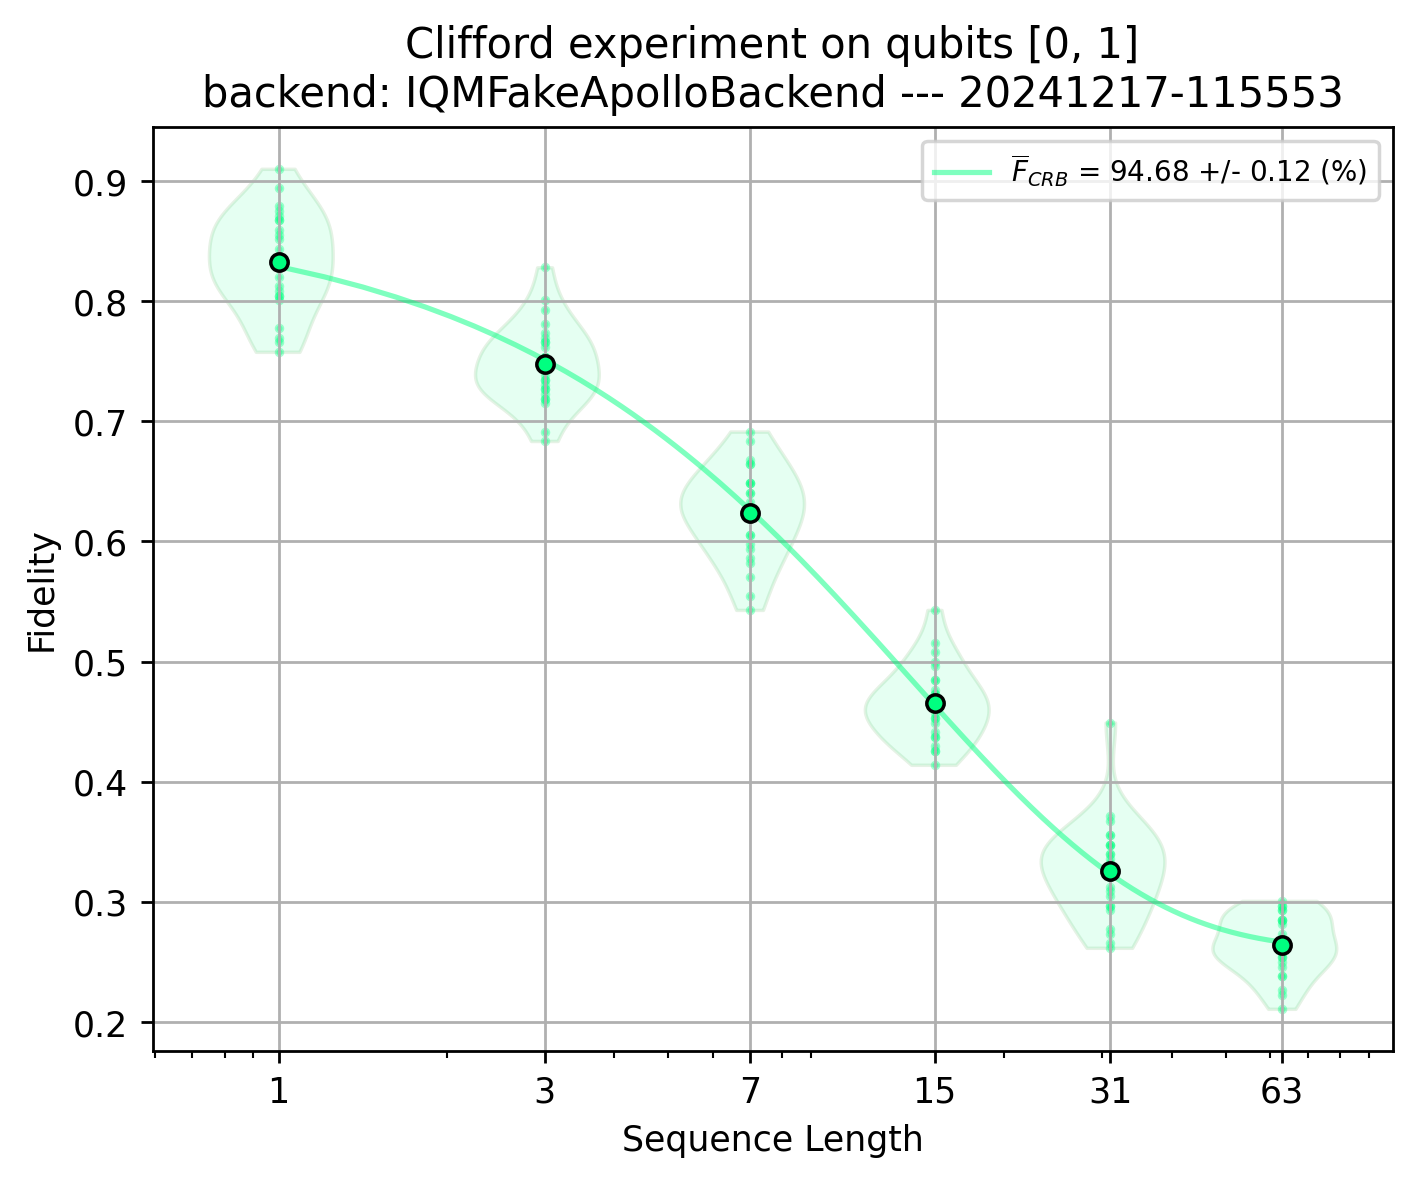

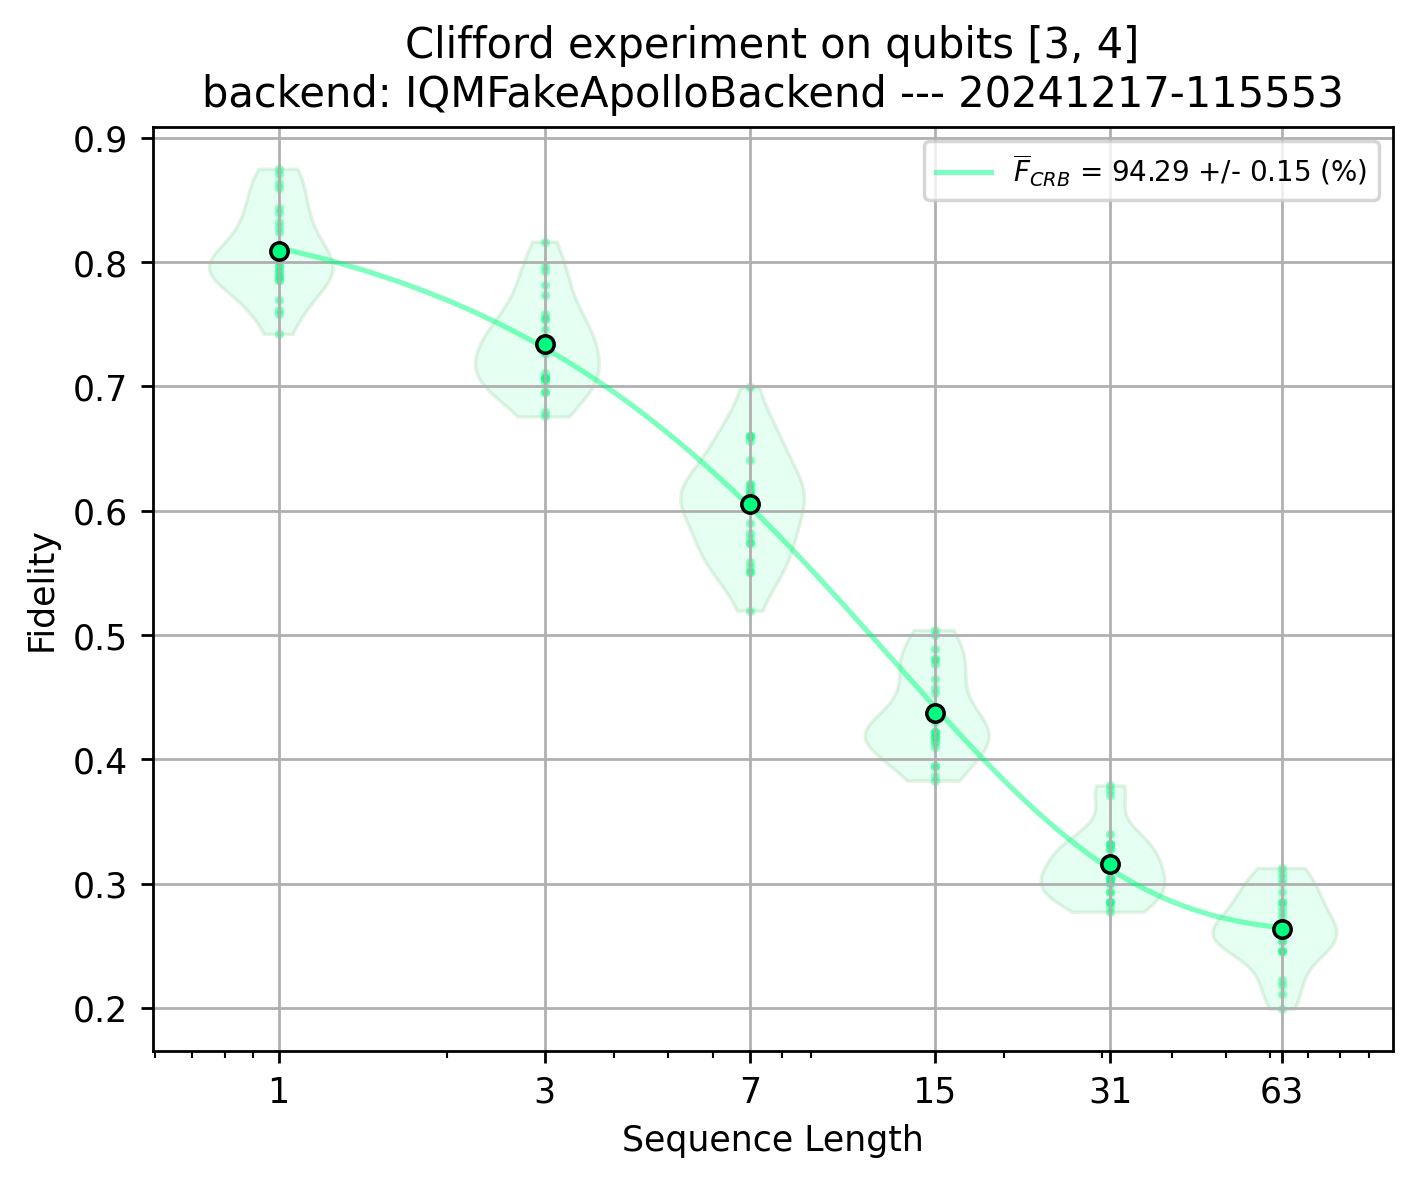

In [20]:
for plot in result_clifford_rb.plots.values():
    display(plot)